# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
from src.make_db import create_movies_db
import pandas as pd

In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [127]:
#Importing all the packages I need
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#Importing the data from bom movie
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
df = pd.read_sql('''SELECT * 
FROM bom_movie_gross 
WHERE foreign_gross IS NOT NULL''',conn)
df

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...
2032,3275,I Still See You,LGF,1400.0,1500000,2018
2033,3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
2034,3309,Time Freak,Grindstone,10000.0,256000,2018
2035,3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [111]:
#movies and their worldwide gross
cur.execute('''SELECT movie, worldwide_gross
FROM tn_movie_budgets 
''')
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head(10)





,movie,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
5,Star Wars Ep. VII: The Force Awakens,"$2,053,311,220"
6,Avengers: Infinity War,"$2,048,134,200"
7,Pirates of the Caribbean: At Worldâs End,"$963,420,425"
8,Justice League,"$655,945,209"
9,Spectre,"$879,620,923"


In [112]:
# spits out runtime and title
runtime = cur.execute('''
SELECT runtime_minutes, original_title 
FROM imdb_title_basics
ORDER BY runtime_minutes DESC ;
''')
runtime = pd.DataFrame(cur.fetchall())
runtime.columns = [i[0] for i in cur.description]
runtime.head(10)



,runtime_minutes,original_title
0,51420.0,Logistics
1,14400.0,Modern Times Forever
2,6017.0,Nari
3,6000.0,Hunger!
4,5460.0,London EC1
5,4980.0,Ember Glow
6,4200.0,Foreclose
7,4080.0,Nieuwe Tieten
8,3450.0,City of Eternal Spring
9,3077.0,A 2nd generation film


In [113]:
#joins runtime and worldwide gross
rtandgross = cur.execute('''
SELECT runtime_minutes, original_title, worldwide_gross
FROM imdb_title_basics JOIN tn_movie_budgets 
ON original_title = movie 
''')
rtandgross = pd.DataFrame(cur.fetchall())
rtandgross.columns = [i[0] for i in cur.description]
rtandgross.head(10)
rtandgross['worldwide_gross'] = rtandgross['worldwide_gross'].str.replace('$', '').str.replace(',', '')
rtandgross['worldwide_gross'] = rtandgross['worldwide_gross'].astype(int)

In [114]:
rtandgross.head(10)

,runtime_minutes,original_title,worldwide_gross
0,91.0,Foodfight!,73706
1,NaN,Mortal Kombat,122133227
2,88.0,The Overnight,1165996
3,124.0,On the Road,9313302
4,114.0,The Secret Life of Walter Mitty,187861183
5,114.0,A Walk Among the Tombstones,62108587
6,124.0,Jurassic World,1648854864
7,119.0,The Rum Diary,21544732
8,92.0,The Three Stooges,54052249
9,98.0,Anderson's Cross,0


In [115]:
#puts it in order by worldwide_gross
orderedrtandgross =rtandgross.sort_values('worldwide_gross', ascending=False)
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
1734,NaN,Titanic,2208208395
3414,115.0,Titanic,2208208395
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
97,143.0,The Avengers,1517935897
...,...,...,...
2325,NaN,Pancakes,0
1335,7.0,Home,0
1338,95.0,Down and Dangerous,0
1351,NaN,Checkmate,0


In [116]:
#drops all duplicates
orderedrtandgross.drop_duplicates(subset = "original_title", keep=False, inplace=True)

In [117]:
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
1664,141.0,Avengers: Age of Ultron,1403013963
1069,134.0,Black Panther,1348258224
2645,128.0,Jurassic World: Fallen Kingdom,1305772799
...,...,...,...
2099,87.0,Stung,0
1329,86.0,Hansel & Gretel Get Baked,0
2325,NaN,Pancakes,0
1338,95.0,Down and Dangerous,0


In [118]:
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
1664,141.0,Avengers: Age of Ultron,1403013963
1069,134.0,Black Panther,1348258224
2645,128.0,Jurassic World: Fallen Kingdom,1305772799
...,...,...,...
2099,87.0,Stung,0
1329,86.0,Hansel & Gretel Get Baked,0
2325,NaN,Pancakes,0
1338,95.0,Down and Dangerous,0


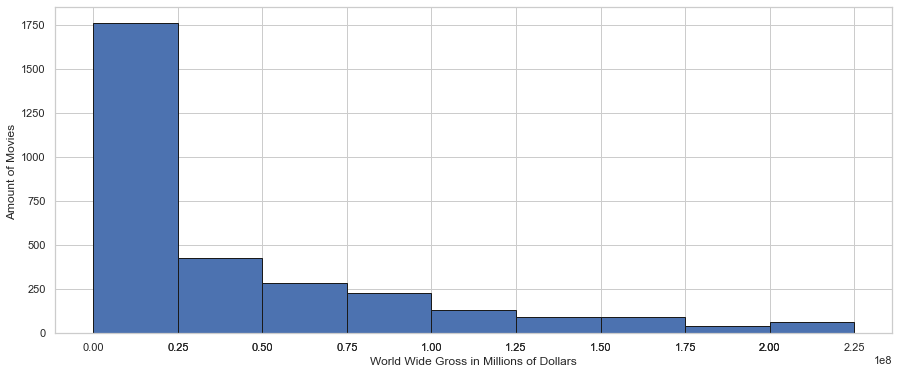

In [213]:
#Makes a bar plot of all the movies that have diffrent world wide gross
x = orderedrtandgross.worldwide_gross
df = pd.DataFrame({"x":x})
fig, ax = plt.subplots(figsize=(15,6))
bins= [0,25000000,25000000,50000000,50000000,75000000,75000000,100000000,
       100000000,125000000,125000000,150000000,150000000,175000000,175000000,200000000,
       200000000,200000000,225000000 ]
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('World Wide Gross in Millions of Dollars')
plt.ylabel('Amount of Movies ')


plt.show()

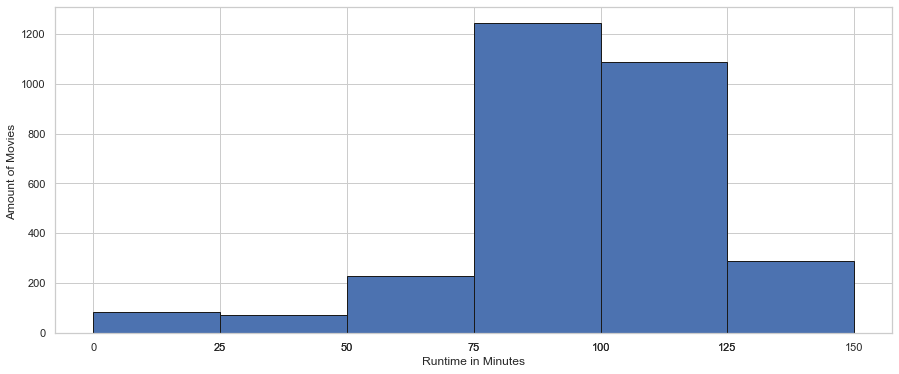

In [212]:
#Makes a bar plot of the movies that have diffrent run times
x = orderedrtandgross.runtime_minutes
df = pd.DataFrame({"x":x})
fig, ax = plt.subplots(figsize=(15,6))
bins= [0,25 ,25,50 ,50,75 ,75,100 ,100,125 ,125 ,150]
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Amount of Movies ')


plt.show()

In [121]:
#What run time range produces the best worldwide gross 
orderedrtandgross =rtandgross.sort_values('runtime_minutes', ascending=False)
orderedrtandgross

,runtime_minutes,original_title,worldwide_gross
3223,360.0,Stuck,67505
3193,312.0,The Collector,10473836
2774,189.0,Werk ohne Autor,4331152
2437,184.0,Hamlet,7129670
2436,184.0,Hamlet,2419669
...,...,...,...
3525,NaN,The Girl on the Train,174278214
3530,NaN,Sisters,106030660
3532,NaN,Trapped,6916869
3533,NaN,The Promise,10551417


In [122]:
#only outputs values between
orderedrtandgros = orderedrtandgross.loc[(orderedrtandgross["worldwide_gross"]>=10000000)& 
                                         (orderedrtandgross["worldwide_gross"]<=3000000000)]

orderedrtandgros                                       


,runtime_minutes,original_title,worldwide_gross
3193,312.0,The Collector,10473836
148,180.0,The Wolf of Wall Street,389870414
3207,172.0,Contact,165900000
504,172.0,Cloud Atlas,130673154
2631,170.0,Sultan,72989781
...,...,...,...
3521,NaN,Diner,12592907
3523,NaN,Never Let Me Go,11173718
3525,NaN,The Girl on the Train,174278214
3530,NaN,Sisters,106030660


In [123]:
#puts data in order of world wide gross
orderedrtandgross2 =orderedrtandgros.sort_values('worldwide_gross', ascending=False)
orderedrtandgross2

,runtime_minutes,original_title,worldwide_gross
3414,115.0,Titanic,2208208395
1734,NaN,Titanic,2208208395
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
97,143.0,The Avengers,1517935897
...,...,...,...
3195,NaN,Dirty Work,10020081
2840,103.0,Dirty Work,10020081
3270,NaN,King Kong,10000650
1360,89.0,Maniac,10000000


In [139]:
#drops duplicates 

orderedrtandgross2.drop_duplicates(subset = "original_title", keep=False, inplace=True)
orderedrtandgross2

,runtime_minutes,original_title,worldwide_gross
2416,149.0,Avengers: Infinity War,2048134200
6,124.0,Jurassic World,1648854864
1664,141.0,Avengers: Age of Ultron,1403013963
1069,134.0,Black Panther,1348258224
2645,128.0,Jurassic World: Fallen Kingdom,1305772799
...,...,...,...
1578,160.0,ABCD (Any Body Can Dance),10137234
2769,118.0,Marshall,10116816
1283,NaN,The Wash,10097096
2477,124.0,Queen of Katwe,10055481


In [126]:
#prints the mean runtime of top ten worldwide grossing movies
import statistics
print(statistics.mean([149, 124, 141, 134, 128, 118, 136, 91, 143, 147]))

131.1


In [156]:
#drop null values from run time
orderedrtandgross2.dropna(subset=['runtime_minutes'])


,runtime_minutes,original_title,worldwide_gross
2416,149,Avengers: Infinity War,2048134200
6,124,Jurassic World,1648854864
1664,141,Avengers: Age of Ultron,1403013963
1069,134,Black Panther,1348258224
2645,128,Jurassic World: Fallen Kingdom,1305772799
...,...,...,...
1578,160,ABCD (Any Body Can Dance),10137234
2769,118,Marshall,10116816
1283,0,The Wash,10097096
2477,124,Queen of Katwe,10055481


In [167]:
#replaces Null values 
orderedrtandgross2['runtime_minutes'] = orderedrtandgross2['runtime_minutes'].fillna(0)

In [189]:
#makes non int into int
orderedrtandgross2['runtime_minutes'] = orderedrtandgross2['runtime_minutes'].astype(int)
orderedrtandgross3 =orderedrtandgross2.drop(['original_title'], axis=1)

In [190]:
#just to see my dtypes
orderedrtandgross3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 2416 to 726
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   runtime_minutes  1129 non-null   int64
 1   worldwide_gross  1129 non-null   int64
dtypes: int64(2)
memory usage: 66.5 KB


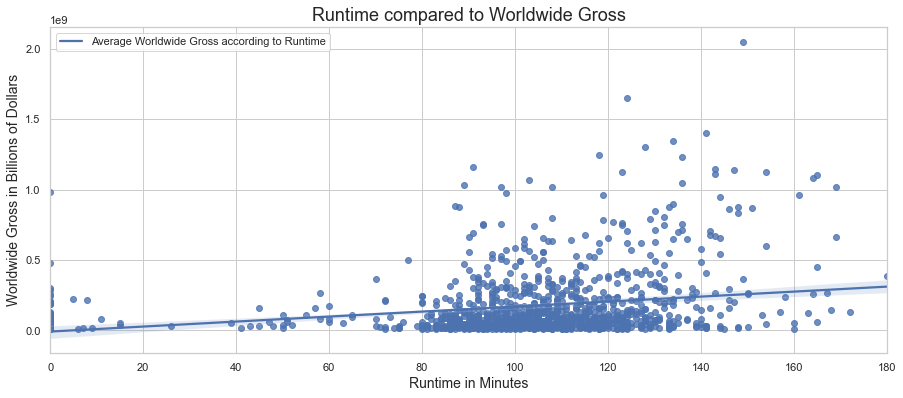

In [211]:
# Creates scatter plot of Runtime vs Worldwide Gross
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Runtime compared to Worldwide Gross", fontsize=18)
sns.regplot(data=orderedrtandgross3, x='runtime_minutes', y='worldwide_gross')
ax.set_xlabel("Runtime in Minutes", fontsize=14)
ax.set_ylabel("Worldwide Gross in Billions of Dollars", fontsize=14)
ax.legend(["Average Worldwide Gross according to Runtime"]);